In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from pandas.tseries.offsets import Nano

In [44]:
filename = 'creation_time_1.csv'

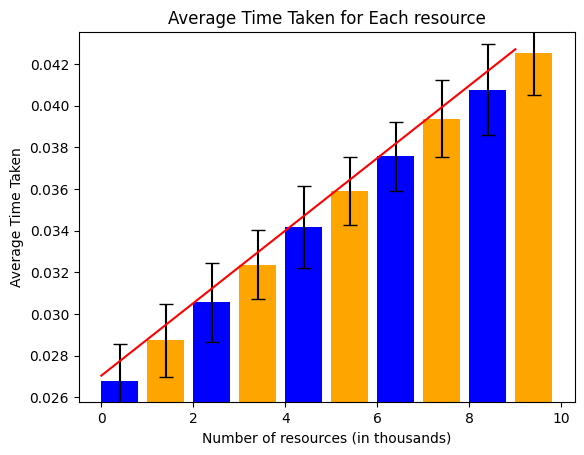

In [45]:
df = pd.read_csv(f"results/{filename}")

bin_size = 1000
bin_edges = np.arange(0, df['i'].max() + bin_size, bin_size)

df['bin'] = pd.cut(df['i'], bins=bin_edges)
df_grouped = df.groupby('bin')['time_taken'].mean()

df_std = df.groupby('bin')['time_taken'].std()

colors = ['blue' if i%2 == 0 else 'orange' for i in range(len(df_grouped))]

# Add error bars to the plot
plt.bar(range(len(df_grouped)), df_grouped, yerr=df_std, align='edge', width=0.8, color=colors, capsize=5)

plt.xlabel('Number of resources (in thousands)')
plt.ylabel('Average Time Taken')
plt.title('Average Time Taken for Each resource')

plt.ylim(df_grouped.min() - 0.001, df_grouped.max() + 0.001)

# Fit a regression line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(df_grouped)), df_grouped)
plt.plot(range(len(df_grouped)), intercept + slope * np.array(range(len(df_grouped))), 'r', label='fitted line')

plt.show()